In [1]:
# import nedded libraries
import pandas as pd
import numpy as np
#Data visualisation libraries 
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [ ]:
### Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard 
### Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine
### Learning Repository1):

### 1. CRIM: per capita crime rate by town.
### 2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
### 3. INDUS: proportion of non-retail business acres per town
### 4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
### 5. NOX: nitric oxides concentration (parts per 10 million) 1https://archive.ics.uci.edu/ml/datasets/Housing 
                ## 123 20.2. Load the Dataset 124 
### 6. RM: average number of rooms per dwelling 
### 7. AGE: proportion of owner-occupied units built prior to 1940 
### 8. DIS: weighted distances to ﬁve Boston employment centers 
### 9. RAD: index of accessibility to radial highways 
### 10.TAX: full-value property-tax rate per $10,000 
### 11.PTRATIO: pupil-teacher ratio by town 
### 12.B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
### 13.LSTAT: % lower status of the population 
### 14.MEDV: Median value of owner-occupied homes in $1000s We can see that the input attributes have a mixture of 
###     units.

In [2]:
# data describtion

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(r'C:\Users\Amr.Abdelfattah\machine-learning-course\housing.csv', delim_whitespace=True, names=names)
display(df.head())
display(df.info())
display(df.describe())
display(df.columns)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
sns.distplot(df['NOX'])
sns.distplot(df['CHAS'])


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

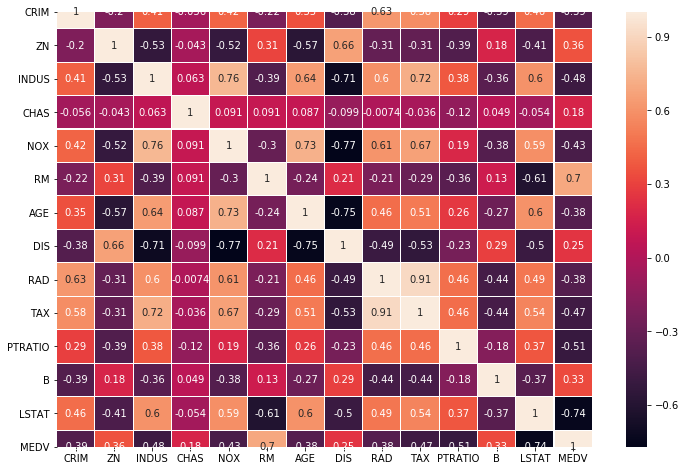

In [3]:
# df.replace(-9999.000000, np.nan, inplace=True)
display(df.isna().sum())
df.dropna(inplace=True)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,ax=ax,linewidths=0.1)

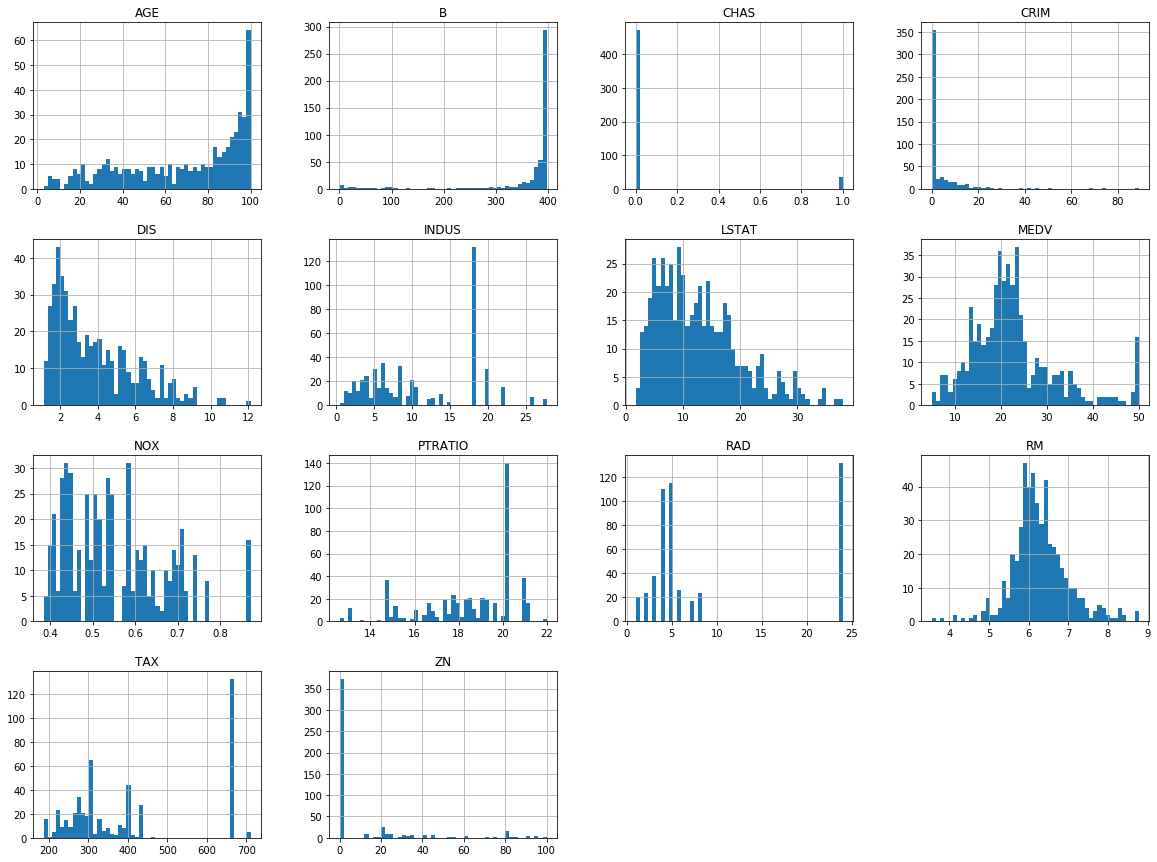

In [4]:
df.hist(bins=50, figsize=(20,15))
plt.show()

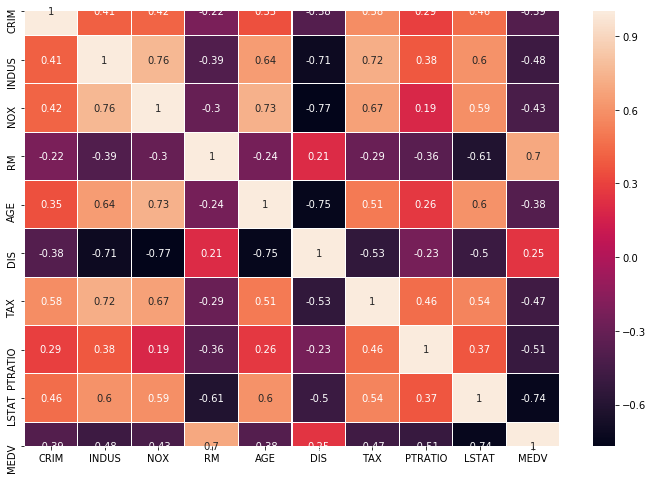

In [5]:
df_new = df.drop(columns = ['RAD','CHAS','ZN','B'],axis=1)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_new.corr(),annot=True,ax=ax,linewidths=0.1)

In [6]:
df_new

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,6.48,22.0


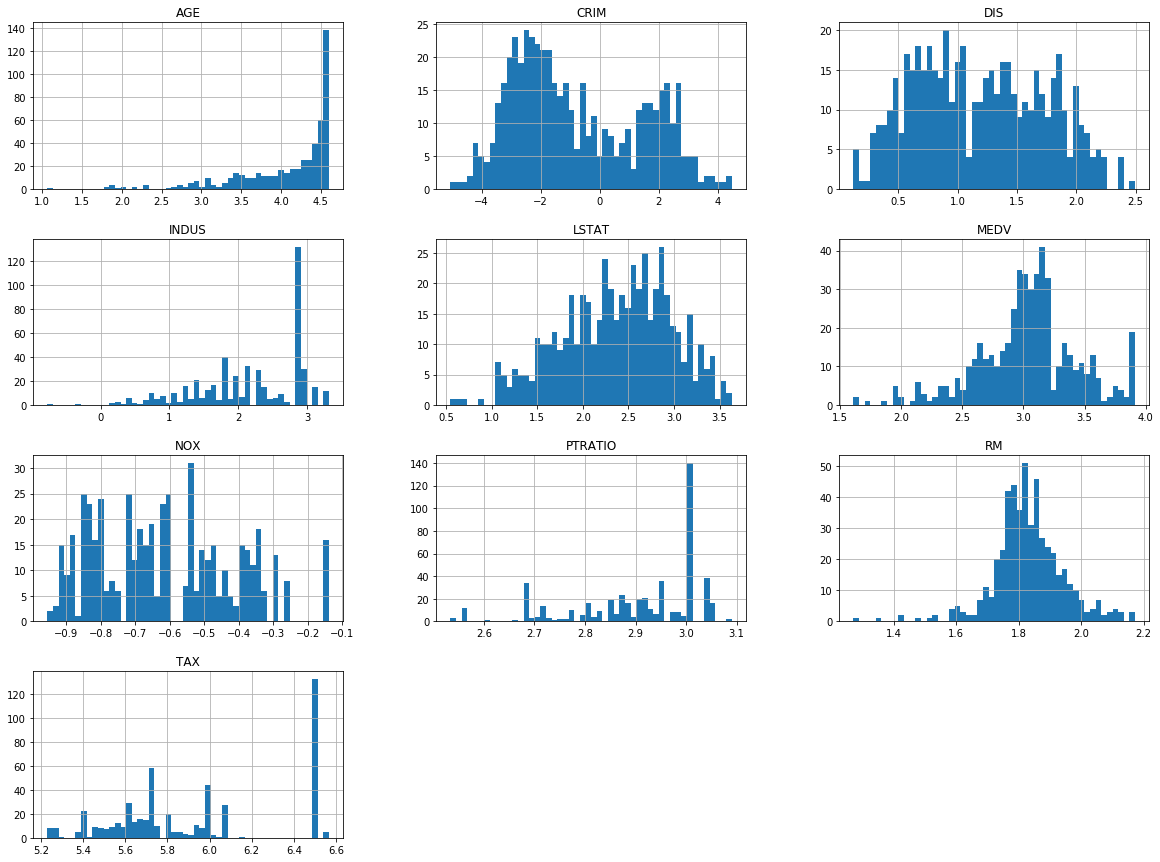

In [7]:
import numpy as np
df_new=np.log(df_new)
df_new.dropna(inplace=True)
df_new.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
df_new.corr()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,0.739553,0.806988,-0.324158,0.554640,-0.743926,0.809977,0.366308,0.591796,-0.567242
INDUS,0.739553,1.000000,0.750463,-0.429582,0.519392,-0.730297,0.659285,0.417802,0.617578,-0.553887
NOX,0.806988,0.750463,1.000000,-0.318269,0.677214,-0.860018,0.668307,0.202592,0.592136,-0.515251
RM,-0.324158,-0.429582,-0.318269,1.000000,-0.218970,0.280731,-0.306417,-0.339628,-0.651116,0.610437
AGE,0.554640,0.519392,0.677214,-0.218970,1.000000,-0.687310,0.410368,0.205649,0.551631,-0.388498
DIS,-0.743926,-0.730297,-0.860018,0.280731,-0.687310,1.000000,-0.599621,-0.215174,-0.524343,0.405721
TAX,0.809977,0.659285,0.668307,-0.306417,0.410368,-0.599621,1.000000,0.412256,0.514301,-0.557184
PTRATIO,0.366308,0.417802,0.202592,-0.339628,0.205649,-0.215174,0.412256,1.000000,0.403801,-0.492654
LSTAT,0.591796,0.617578,0.592136,-0.651116,0.551631,-0.524343,0.514301,0.403801,1.000000,-0.822960
MEDV,-0.567242,-0.553887,-0.515251,0.610437,-0.388498,0.405721,-0.557184,-0.492654,-0.822960,1.000000


In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_new, figsize=(20, 20))
plt.show()

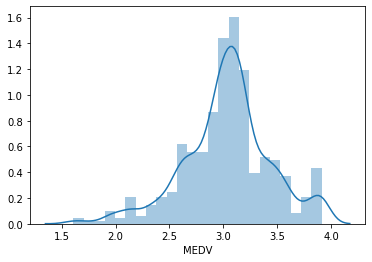

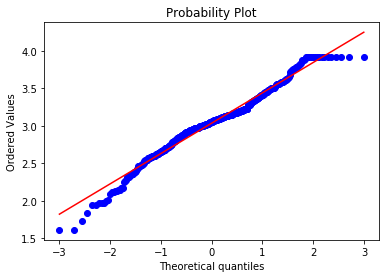

In [12]:
from scipy import stats
sns.distplot(df_new['MEDV'], hist=True);
fig = plt.figure()
res = stats.probplot(df_new['MEDV'], plot=plt)

In [48]:
# feature scaling and model training
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,train_test_split

min_max_scaler = preprocessing.MinMaxScaler()
X = df_new.loc[:,df_new.columns!='MEDV'] # features
Y = df_new['MEDV'] # label
X = min_max_scaler.fit_transform(X)
linear_reg = LinearRegression()
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)
linear_reg.fit(xtrain,ytrain)
preds=linear_reg.predict(xtest)
print('model rmse = ',np.mean((preds-ytest)**2))

model rmse =  0.04856412543418305


In [45]:
# test model with cross validation
# visualize rmse scores 
import plotly.graph_objects as go
scores = cross_val_score(linear_reg, X , Y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = -scores
fig = go.Figure(
    data=[go.Bar(x=[i for i in range(7)],y=list(rmse_scores)[2:10])],
    layout_title_text="cv versus model error")
fig.show()

In [49]:
lm = LinearRegression()
train_sizes, train_scores, test_scores = learning_curve(estimator=lm,
                                                        X=xtrain,
                                                        y=ytrain,
                                                        scoring = 'neg_mean_squared_error',
                                                       cv=10)
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
predictions = lm.predict(xtest)
error=np.sqrt(mean_squared_error(ytest,predictions)) # rmse
print("RMSE : ",error)

RMSE :  0.22037269666222958


In [ ]:
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()